## To what extent do administrative and legal hurdles affect the effective number of parties?

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv("data.csv", sep=";")

Text(0, 0.5, 'Average effective number of parties')

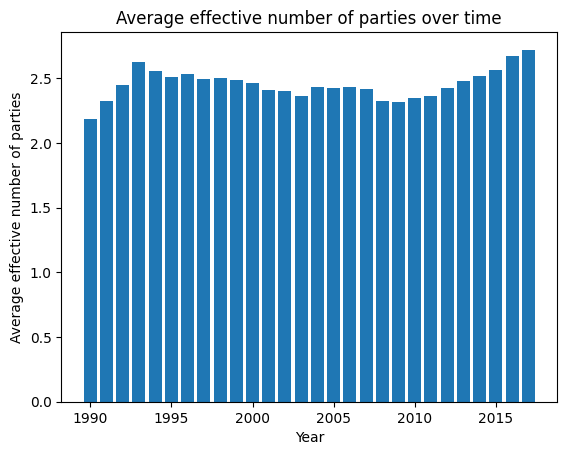

In [88]:
years = df["Year"]
eff_parties = df["Enep"]

avg_parties = df.groupby("Year")["Enep"].mean()
plt.bar(avg_parties.index,avg_parties)
plt.title("Average effective number of parties over time")
plt.xlabel("Year")
plt.ylabel("Average effective number of parties")

In [89]:
most_parties = df[["Country", "Year", "Enep"]].nlargest(20, "Enep")
print(most_parties)

                 Country  Year      Enep
1037              Poland  1991  7.351249
1038              Poland  1992  7.351249
1039              Poland  1993  6.831489
1040              Poland  1994  5.527090
1041              Poland  1995  5.527090
1042              Poland  1996  5.527090
94               Belgium  2000  5.481879
95               Belgium  2001  5.481879
96               Belgium  2002  5.481879
105              Belgium  2011  5.337314
106              Belgium  2012  5.337314
107              Belgium  2013  5.337314
133   Bosnia-Herzegovina  2011  5.292198
134   Bosnia-Herzegovina  2012  5.292198
135   Bosnia-Herzegovina  2013  5.292198
93               Belgium  1999  5.287010
86               Belgium  1992  5.239627
87               Belgium  1993  5.239627
88               Belgium  1994  5.239627
136   Bosnia-Herzegovina  2014  5.231657


## Administrative hurdles 
- Definition: Degree of administrative hurdles to become an electoral competitor 
- Hypothesis: Higher hurdles decrease the number of effective parties

array([[ 1.        , -0.05165684],
       [-0.05165684,  1.        ]])

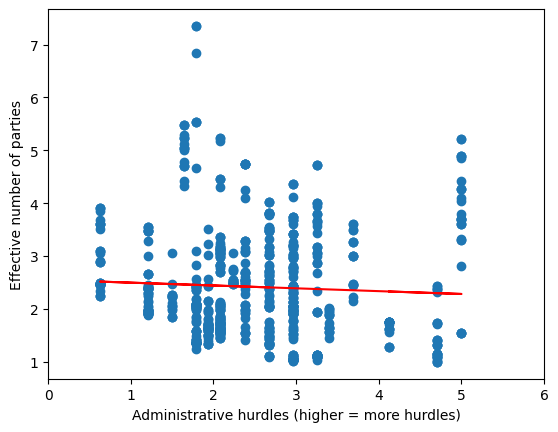

In [90]:


df_clean = df[["Adminhurd", "Enep"]].dropna()

# Reversal for interpretation: Higher number = higher hurdles
admin_hurdles = df_clean["Adminhurd"] * -1 + 6
effective_parties = df_clean["Enep"]

m, b = np.polyfit(admin_hurdles, effective_parties, 1)

plt.plot(admin_hurdles, m*admin_hurdles + b, color='red')
plt.xlim(0,6)
plt.xlabel("Administrative hurdles (higher = more hurdles)")
plt.ylabel("Effective number of parties")
plt.scatter(admin_hurdles , effective_parties)
np.corrcoef(admin_hurdles, effective_parties)



## Results
- Slightly negative relationship as expected, but probably nothing significant

## Does electoral distortion reduce the number of effective parties?

- REP_SR3: Aggregation of Gallagher Index and Issue Congruence

array([[ 1.        , -0.06899042],
       [-0.06899042,  1.        ]])

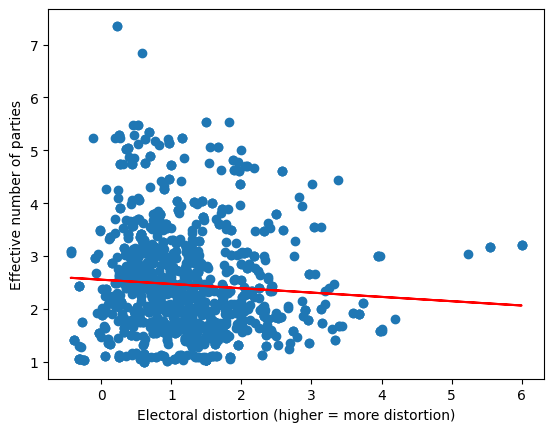

In [91]:
df_clean = df[["REP_SR3", "Enep"]].dropna()

x = df_clean["REP_SR3"] * -1 + 7
effective_parties = df_clean["Enep"]

m, b = np.polyfit(x, effective_parties, 1)

plt.plot(x, m*x + b, color='red')
plt.xlabel("Electoral distortion (higher = more distortion)")
plt.ylabel("Effective number of parties")
plt.scatter(x, effective_parties)
np.corrcoef(x, effective_parties)

### What if we dropped the IV outliers?

array([[ 1.        , -0.09615736],
       [-0.09615736,  1.        ]])

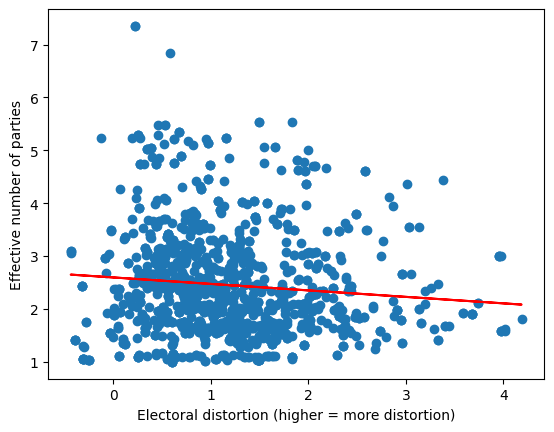

In [92]:
# Copy because we dont want to mutate to main dataframe
df_clean = df[["REP_SR3", "Enep"]].copy()

df_clean["REP_SR3"] = df_clean["REP_SR3"] * -1 + 7 
df_clean = df_clean[df_clean["REP_SR3"] <= 5].dropna()

x = df_clean["REP_SR3"]
effective_parties = df_clean["Enep"]

m, b = np.polyfit(x, effective_parties, 1)

plt.plot(x, m*x + b, color='red')
plt.xlabel("Electoral distortion (higher = more distortion)")
plt.ylabel("Effective number of parties")
plt.scatter(x, effective_parties)
np.corrcoef(x, effective_parties)

## A look into the outliers

In [93]:
print(df[["Country", "Year", "REP_SR3"]].loc[df["REP_SR3"] > 1].nsmallest(10, columns="REP_SR3"))

              Country  Year   REP_SR3
16            Albania  2006  1.445144
17            Albania  2007  1.445144
18            Albania  2008  1.445144
960   North Macedonia  1998  1.769715
254           Croatia  1992  2.813239
1402   United Kingdom  1992  2.987284
1406   United Kingdom  1996  2.987703
1403   United Kingdom  1993  3.023632
1404   United Kingdom  1994  3.023632
1405   United Kingdom  1995  3.023632


### Historical composition of Albanias election system
<img src="images/albania_parliament.png" alt="albania" width="800"/>

### Albanias election reforms

- For the 2009 election, several constitutional reforms changed the election law ([Bertelsmann](https://www.kas.de/de/einzeltitel/-/content/parlamentswahlen-2009-in-albanien1))
- We find that this actually reduced electoral distortion!

In [94]:
print(df[["Country", "Year", "REP_SR3"]][(df["Country"] == "Albania") & (df["Year"] >= 2008)])

    Country  Year   REP_SR3
18  Albania  2008  1.445144
19  Albania  2009  3.801318
20  Albania  2010  6.044092
21  Albania  2011  6.044092
22  Albania  2012  6.044092
23  Albania  2013  6.267091
24  Albania  2014  6.468023
25  Albania  2015  6.468023
26  Albania  2016  6.468023
27  Albania  2017  6.650095


## 
![Albanien_2006](images/albania_parliament.png)




## Does electoral openness increase the amount of effective parties?

- Manual aggregation of ***CO_OPEN1*** and ***CO_OPEN3***
- Why?
    - ***CO_OPEN2*** contains ***Enep*** -> endogeneity problem!!
- Note: This aggregation might not be consistent with the aggregation methods used by the authors

array([[1.        , 0.20065052],
       [0.20065052, 1.        ]])

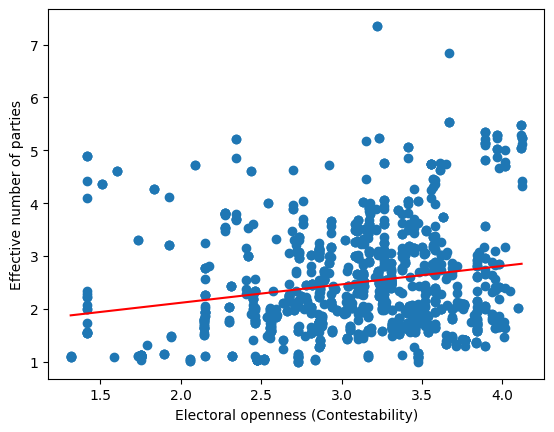

In [95]:
clean_df = df[["CO_OPEN1", "CO_OPEN3", "Enep"]].dropna()


x = (clean_df["CO_OPEN1"] + clean_df["CO_OPEN3"]) / 2
y = clean_df["Enep"]

m1, b = np.polyfit(x,y,1)

x_line = np.linspace(x.min(), x.max(), 100)
y_line = m1*x_line + b

plt.plot(x_line, y_line, color="red")

plt.xlabel("Electoral openness (Contestability)")
plt.ylabel("Effective number of parties")

plt.scatter(x,y)
np.corrcoef(x,y)


## Summary of Results

- **Negative correlation**: The red trend line slopes slightly downward, meaning that as administrative hurdles increase, the effective number of parties tends to decrease.
- **Distribution/spread**: There are some countries with a high number of parties despite many hurdles, the relationship is very weak, but overall, there are more countries with fewer parties when hurdles are high.
- **Conclusion**: Administrative and legal hurdles overall act to restrict party diversity, but the effect is not very pronounced in this dataset—other factors could also play an important role.


## Cross Validation

- **Grofman, B., et al. (1985). "Rethinking Duverger's Law: Predicting the Effective Number of Political Parties."**
  - Finds that stricter electoral laws and institutional barriers decrease party system fragmentation and the effective number of parties.

- **British Journal of Political Science. (2024). "Does Party-System Fragmentation Affect the Quality of Democracy?"**
  - Shows that high legal and administrative thresholds directly lower the number of effective parties and concentrate representation.

- **SCIELO. (2024). "Political Reform, Partisan Fragmentation and..."**
  - Illustrates that reducing administrative barriers increases the number of parties, while increased hurdles consolidate major party power.
